# **Libraries**
---

In [2]:
import sys
import os
sys.path.append('..')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("=== COMPARATIVE ANALYSIS OF GRADIENT BOOSTING MODELS ===")
print("=== FOR PREDICTING BANK CUSTOMER CHURN ===")
print("\n📊 Loading datasets...")

# First, let's check what files we have
data_path = "../data/raw"
print(f"Checking data directory: {data_path}")
if os.path.exists(data_path):
    files = os.listdir(data_path)
    print(f"Available files: {files}")
else:
    print("Data directory not found!")

# Load the datasets directly
churn_path = "../data/raw/Churn_Modelling.csv"
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

print("\n📁 Loading individual datasets...")

# Load original dataset
if os.path.exists(churn_path):
    original_df = pd.read_csv(churn_path)
    print(f"✅ Original dataset loaded: {original_df.shape}")
else:
    print(f"❌ Original dataset not found: {churn_path}")

# Load competition datasets
if os.path.exists(train_path):
    competition_train_df = pd.read_csv(train_path)
    print(f"✅ Competition train loaded: {competition_train_df.shape}")
else:
    print(f"❌ Competition train not found: {train_path}")

if os.path.exists(test_path):
    competition_test_df = pd.read_csv(test_path)
    print(f"✅ Competition test loaded: {competition_test_df.shape}")
else:
    print(f"❌ Competition test not found: {test_path}")

print("\n✅ Data loading completed!")

=== COMPARATIVE ANALYSIS OF GRADIENT BOOSTING MODELS ===
=== FOR PREDICTING BANK CUSTOMER CHURN ===

📊 Loading datasets...
Checking data directory: ../data/raw
Available files: ['Churn_Modelling.csv', 'test.csv', 'train.csv']

📁 Loading individual datasets...
✅ Original dataset loaded: (10000, 14)
✅ Competition train loaded: (165034, 14)
✅ Competition test loaded: (110023, 13)

✅ Data loading completed!
✅ Competition train loaded: (165034, 14)
✅ Competition test loaded: (110023, 13)

✅ Data loading completed!


# **Import Data**
---

In [3]:
print("=== DATASET EXPLORATION ===")
print("\n1. ORIGINAL DATASET (Churn_Modelling.csv)")
print(f"Shape: {original_df.shape}")
print(f"Columns: {list(original_df.columns)}")
print(f"Churn rate: {original_df['Exited'].mean():.3f}")

print("\n2. COMPETITION TRAIN DATASET")
print(f"Shape: {competition_train_df.shape}")
print(f"Columns: {list(competition_train_df.columns)}")
print(f"Churn rate: {competition_train_df['Exited'].mean():.3f}")

print("\n3. COMPETITION TEST DATASET")
print(f"Shape: {competition_test_df.shape}")
print(f"Columns: {list(competition_test_df.columns)}")

# Check for missing values
print("\n=== MISSING VALUES ANALYSIS ===")
print("Original dataset missing values:")
print(original_df.isnull().sum())

print("\nCompetition train missing values:")
print(competition_train_df.isnull().sum())

print("\nCompetition test missing values:")
print(competition_test_df.isnull().sum())

# Data types
print("\n=== DATA TYPES ===")
print("Original dataset data types:")
print(original_df.dtypes)

=== DATASET EXPLORATION ===

1. ORIGINAL DATASET (Churn_Modelling.csv)
Shape: (10000, 14)
Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Churn rate: 0.204

2. COMPETITION TRAIN DATASET
Shape: (165034, 14)
Columns: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Churn rate: 0.212

3. COMPETITION TEST DATASET
Shape: (110023, 13)
Columns: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

=== MISSING VALUES ANALYSIS ===
Original dataset missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure       

# **Exploratory**
---

In [4]:
print("=== DATASET COMBINATION STRATEGY ===")
print("Following the optimal strategy for CatBoostEncoder:")
print("1. Place original dataset FIRST")
print("2. Append competition dataset SECOND")
print("3. This ensures stable encoding values learned from large original dataset")

# Clean original dataset (remove unnecessary columns)
original_clean = original_df.copy()
if 'RowNumber' in original_clean.columns:
    original_clean = original_clean.drop(['RowNumber'], axis=1)
if 'CustomerId' in original_clean.columns:
    original_clean = original_clean.drop(['CustomerId'], axis=1)
if 'Surname' in original_clean.columns:
    original_clean = original_clean.drop(['Surname'], axis=1)

print(f"\nOriginal dataset after cleaning: {original_clean.shape}")
print(f"Competition train dataset: {competition_train_df.shape}")

# Ensure same column order
common_cols = list(set(original_clean.columns) & set(competition_train_df.columns))
print(f"Common columns: {len(common_cols)}")

# Reorder columns
original_clean = original_clean[common_cols]
competition_train_clean = competition_train_df[common_cols]

# Combine datasets: Original FIRST, then Competition
print(f"\nCombining datasets...")
combined_train_df = pd.concat([original_clean, competition_train_clean], ignore_index=True)

print(f"✅ Combined dataset created!")
print(f"   - Original dataset rows: {len(original_clean):,}")
print(f"   - Competition dataset rows: {len(competition_train_clean):,}")
print(f"   - Combined dataset rows: {len(combined_train_df):,}")
print(f"   - Total features: {combined_train_df.shape[1]}")

# Check churn distribution
print(f"\n=== CHURN DISTRIBUTION ANALYSIS ===")
print(f"Original dataset churn rate: {original_clean['Exited'].mean():.4f}")
print(f"Competition dataset churn rate: {competition_train_clean['Exited'].mean():.4f}")
print(f"Combined dataset churn rate: {combined_train_df['Exited'].mean():.4f}")

# Save combined dataset
combined_train_df.to_csv("../data/processed/combined_train.csv", index=False)
competition_test_df.to_csv("../data/processed/test.csv", index=False)
print(f"\n✅ Datasets saved to data/processed/")

=== DATASET COMBINATION STRATEGY ===
Following the optimal strategy for CatBoostEncoder:
1. Place original dataset FIRST
2. Append competition dataset SECOND
3. This ensures stable encoding values learned from large original dataset

Original dataset after cleaning: (10000, 11)
Competition train dataset: (165034, 14)
Common columns: 11

Combining datasets...
✅ Combined dataset created!
   - Original dataset rows: 10,000
   - Competition dataset rows: 165,034
   - Combined dataset rows: 175,034
   - Total features: 11

=== CHURN DISTRIBUTION ANALYSIS ===
Original dataset churn rate: 0.2037
Competition dataset churn rate: 0.2116
Combined dataset churn rate: 0.2111

✅ Datasets saved to data/processed/

✅ Datasets saved to data/processed/


In [ ]:
print("=== EXPLORATORY DATA ANALYSIS ===")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a comprehensive overview
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bank Customer Churn Analysis - Overview', fontsize=16, fontweight='bold')

# 1. Churn Distribution
axes[0,0].pie(combined_train_df['Exited'].value_counts(), 
              labels=['Not Churned', 'Churned'], 
              autopct='%1.1f%%',
              colors=['skyblue', 'lightcoral'])
axes[0,0].set_title('Overall Churn Distribution')

# 2. Age Distribution by Churn
combined_train_df.boxplot(column='Age', by='Exited', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].set_xlabel('Churn Status')

# 3. Credit Score Distribution
combined_train_df.boxplot(column='CreditScore', by='Exited', ax=axes[0,2])
axes[0,2].set_title('Credit Score by Churn Status')
axes[0,2].set_xlabel('Churn Status')

# 4. Geography vs Churn
geo_churn = pd.crosstab(combined_train_df['Geography'], combined_train_df['Exited'], normalize='index')
geo_churn.plot(kind='bar', ax=axes[1,0], color=['skyblue', 'lightcoral'])
axes[1,0].set_title('Churn Rate by Geography')
axes[1,0].set_xlabel('Geography')
axes[1,0].legend(['Not Churned', 'Churned'])
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Gender vs Churn
gender_churn = pd.crosstab(combined_train_df['Gender'], combined_train_df['Exited'], normalize='index')
gender_churn.plot(kind='bar', ax=axes[1,1], color=['skyblue', 'lightcoral'])
axes[1,1].set_title('Churn Rate by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].legend(['Not Churned', 'Churned'])
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Number of Products vs Churn
prod_churn = pd.crosstab(combined_train_df['NumOfProducts'], combined_train_df['Exited'], normalize='index')
prod_churn.plot(kind='bar', ax=axes[1,2], color=['skyblue', 'lightcoral'])
axes[1,2].set_title('Churn Rate by Number of Products')
axes[1,2].set_xlabel('Number of Products')
axes[1,2].legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

# Print key insights
print("\n=== KEY INSIGHTS ===")
print(f"📊 Dataset Size: {len(combined_train_df):,} customers")
print(f"📈 Overall Churn Rate: {combined_train_df['Exited'].mean():.1%}")

print(f"\n🌍 Geography Insights:")
for geo in combined_train_df['Geography'].unique():
    churn_rate = combined_train_df[combined_train_df['Geography']==geo]['Exited'].mean()
    print(f"   {geo}: {churn_rate:.1%} churn rate")

print(f"\n👥 Gender Insights:")
for gender in combined_train_df['Gender'].unique():
    churn_rate = combined_train_df[combined_train_df['Gender']==gender]['Exited'].mean()
    print(f"   {gender}: {churn_rate:.1%} churn rate")

print(f"\n🏦 Product Insights:")
for prod in sorted(combined_train_df['NumOfProducts'].unique()):
    churn_rate = combined_train_df[combined_train_df['NumOfProducts']==prod]['Exited'].mean()
    count = len(combined_train_df[combined_train_df['NumOfProducts']==prod])
    print(f"   {prod} product(s): {churn_rate:.1%} churn rate ({count:,} customers)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_edadata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Check for missing values
print("Missing values per column:")
print(bank_edadata.isnull().sum())

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# Check for duplicated values
duplicate_count = bank_edadata.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

# If duplicates exist, drop them
if duplicate_count > 0:
    bank_edadata = bank_edadata.drop_duplicates()
    print("Duplicated rows have been removed.")
else:
    print("No duplicated rows found.")

Number of duplicated rows: 0
No duplicated rows found.


In [8]:
#Drop the columns that are not useful for modeling
drop_columns = ['RowNumber', 'CustomerId', 'Surname']
bank_edadata = bank_edadata.drop(columns=drop_columns, axis=1)

In [9]:
bank_edadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# **Data snooping**
---

In [ ]:
# Data-snooping

#Split test-set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank_edadata, bank_edadata["Exited"]):
    strat_train_set = bank_edadata.loc[train_index]
    strat_test_set = bank_edadata.loc[test_index]

In [ ]:
strat_test_set["Exited"].value_counts()/len(strat_test_set)

# **Visualization**
---

In [ ]:
# The proportion of customers' country of origin as a bar chart
geo_counts = bank_edadata['Geography'].value_counts(normalize=True).mul(100).round(2)
ax = geo_counts.plot(kind='bar', color='skyblue')
plt.title("Proportion of Customers by Country of Origin")
plt.ylabel("Percentage (%)")
plt.xlabel("Geography")
plt.ylim(0, 60)
plt.xticks(rotation=360)

for i, v in enumerate(geo_counts):
    ax.text(i, v + 1, f"{v}%", ha='center', va='bottom')

plt.show()

In [ ]:
# The proportion of customers' gender as a bar chart
gender_counts = bank_edadata['Gender'].value_counts(normalize=True).mul(100).round(2)
gender_colors = ['pink' if gender == 'Female' else 'skyblue' for gender in gender_counts.index]
ax = gender_counts.plot(kind='bar', color=gender_colors)
plt.title("Proportion of Customers by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.ylim(0, 60)
plt.xticks(rotation=360)

for i, v in enumerate(gender_counts):
    ax.text(i, v + 1, f"{v}%", ha='center', va='bottom')

plt.show()

In [ ]:
# The proportion of customers' age as a histogram
plt.figure(figsize=(8, 5))
plt.hist(bank_edadata['Age'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Customers by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# The proportion of customers' tenure (in years) with the bank as a bar chart
tenure_counts = bank_edadata['Tenure'].value_counts(normalize=True).sort_index().mul(100).round(2)
ax = tenure_counts.plot(kind='bar', color='orange')
plt.title("Proportion of Customers by Tenure (Years) with the Bank")
plt.xlabel("Tenure (Years)")
plt.ylabel("Percentage (%)")
plt.ylim(0, tenure_counts.max() + 5)
plt.xticks(rotation=0)

for i, v in enumerate(tenure_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()


In [ ]:
# Show the distribution of customers' balance using a histogram
plt.figure(figsize=(8, 5))
plt.hist(bank_edadata['Balance'], bins=20, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Customers' Balance in the Bank")
plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Bar chart to show the proportion of customers' bank product ownership
product_counts = bank_edadata['NumOfProducts'].value_counts(normalize=True).sort_index().mul(100).round(2)
ax = product_counts.plot(kind='bar', color='mediumpurple')
plt.title("Proportion of Customers by Number of Bank Products Owned")
plt.xlabel("Number of Products")
plt.ylabel("Percentage (%)")
plt.ylim(0, product_counts.max() + 5)
plt.xticks(rotation=0)

for i, v in enumerate(product_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()


In [ ]:
# Bar chart to show the proportion of customers with and without credit card ownership
credit_card_counts = bank_edadata['HasCrCard'].value_counts(normalize=True).sort_index().mul(100).round(2)
labels = ['No Credit Card', 'Has Credit Card']
ax = credit_card_counts.plot(kind='bar', color=['lightcoral', 'mediumseagreen'])
plt.title("Proportion of Customers by Credit Card Ownership")
plt.xlabel("Credit Card Ownership")
plt.ylabel("Percentage (%)")
plt.ylim(0, credit_card_counts.max() + 5)
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

for i, v in enumerate(credit_card_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()


In [ ]:
# Bar chart to show the proportion of customers who are and are not active members
active_member_counts = bank_edadata['IsActiveMember'].value_counts(normalize=True).sort_index().mul(100).round(2)
labels = ['Not Active Member', 'Active Member']
ax = active_member_counts.plot(kind='bar', color=['gray', 'mediumseagreen'])
plt.title("Proportion of Customers by Active Membership")
plt.xlabel("Active Membership")
plt.ylabel("Percentage (%)")
plt.ylim(0, active_member_counts.max() + 5)
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

for i, v in enumerate(active_member_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()



In [ ]:
# Histogram to show the proportion of customers' estimated salary

# Plot histogram
ax = bank_edadata['EstimatedSalary'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    density=True,
    alpha=0.7
)
plt.title("Distribution of Customers' Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Proportion")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Bar chart to show the percentage of churn customers (Exited)
churn_counts = bank_edadata['Exited'].value_counts(normalize=True).sort_index().mul(100).round(2)
labels = ['Stayed', 'Churned']
ax = churn_counts.plot(kind='bar', color=['steelblue', 'salmon'])
plt.title("Percentage of Churn Customers")
plt.xlabel("Customer Status")
plt.ylabel("Percentage (%)")
plt.ylim(0, churn_counts.max() + 5)
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

for i, v in enumerate(churn_counts):
    ax.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

plt.show()

## **Handle Noise**
---

In [12]:
bank_edadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
# Separate numerical and categorical columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [15]:
#Function for K and M numerical formatting
def thousands_format(x, pos):
    abs_x = abs(x)
    if abs_x >= 1000000:
        formatted = f"{abs_x/1000000:.0f}M"
    elif abs_x >= 1000:
        formatted = f"{abs_x/1000:.0f}K"
    else:
        formatted = f"{int(abs_x)}"
    
    return f'-{formatted}' if x < 0 else formatted

formatter = FuncFormatter(thousands_format)



In [17]:
def iqr_calculate(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    return Q1, Q3, IQR, lower_bound, upper_bound, outlier_count

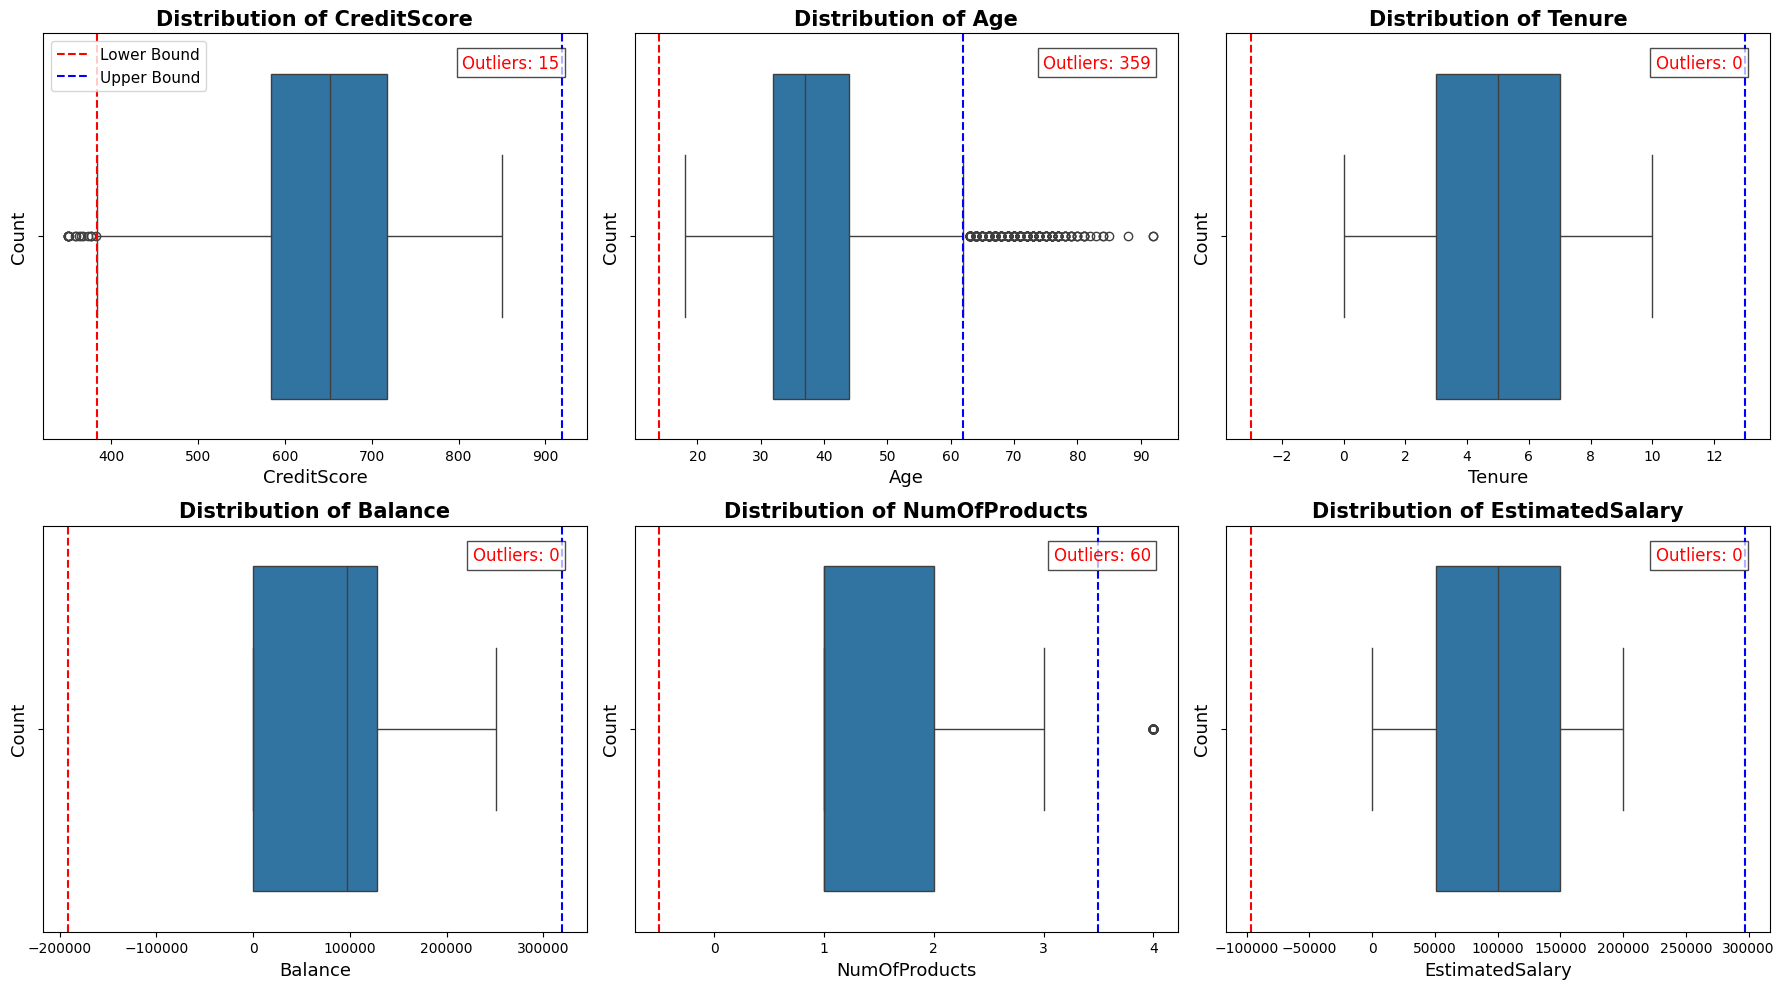

In [20]:
# Box plots
outlier_summary = {}

plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_features):
    ax = plt.subplot(2, 3, i + 1)
    sns.boxplot(data=bank_edadata, x=col, ax=ax)

    Q1, Q3, IQR, lower_bound, upper_bound, outlier_count = iqr_calculate(bank_edadata, col)
    outlier_summary[col] = outlier_count

    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')

    ax.set_title(f'Distribution of {col}', fontsize=15, fontweight='bold')
    ax.set_xlabel(col, fontsize=13)
    ax.set_ylabel('Count', fontsize=13)

    ax.text(0.95, 0.95, f'Outliers: {outlier_count}', 
            verticalalignment='top', horizontalalignment='right', 
            transform=ax.transAxes, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7))

    if i == 0:
        ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [24]:
from pandas.io.formats.style import Styler

# Outliers summary as a DataFrame
outlier_df = pd.DataFrame([
    {
        "Feature": col,
        "Outlier Count": count,
        "Outlier Percentage": (count / len(bank_edadata)) * 100
    }
    for col, count in outlier_summary.items()
])

outlier_df = outlier_df.set_index("Feature")
display(outlier_df.style.format({"Outlier Percentage": "{:.2f}%"}))

,Outlier Count,Outlier Percentage
Feature,,
CreditScore,15,0.15%
Age,359,3.59%
Tenure,0,0.00%
Balance,0,0.00%
NumOfProducts,60,0.60%
EstimatedSalary,0,0.00%


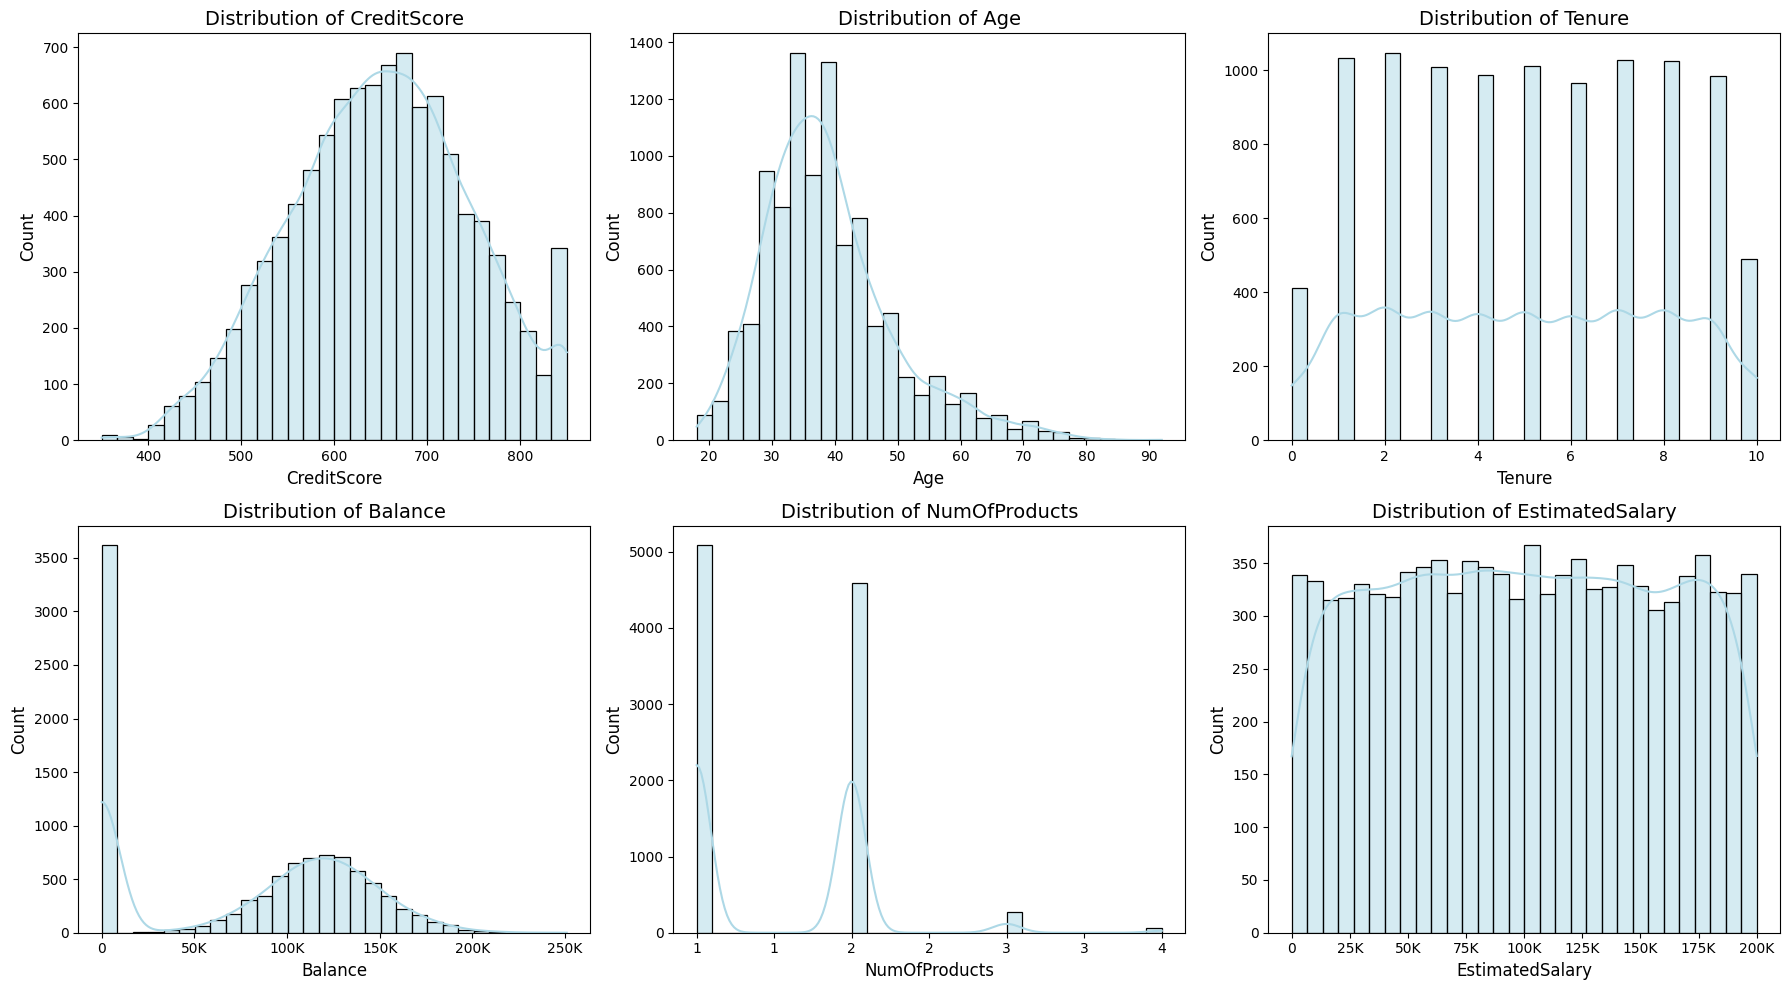

In [21]:
# Hisplots
plt.figure(figsize=(18,10))

for i, col in enumerate(numerical_features):
    ax=plt.subplot(2, 3, i+1)
    sns.histplot(data=bank_edadata, x=col, kde=True, bins=30,ax=ax, color='lightblue', edgecolor='black')

    ax.set_title(f'Distribution of {col}', fontsize =14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## **Correlation**
---

In [ ]:
# Find the correlation between numerical variables
corr_matrix = bank_edadata.corr(numeric_only=True)
print(corr_matrix)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Select numerical features for correlation matrix
num_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank_edadata[num_features])

# Compute correlation matrix using numpy (as sklearn does not have direct correlation matrix)
corr_matrix = np.corrcoef(X_scaled, rowvar=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=num_features, yticklabels=num_features)
plt.title("Scatter Correlation Matrix (Standardized Features)")
plt.show()

